In [55]:
%matplotlib inline

import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MESS

from collections import OrderedDict

## Set some pandas options to show the full rows and columns of a DF
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Where do you want simulations to live?
analysis_dir = "/home/isaac/Continuosity/MESS/analysis/figure3-sims/"
ipyclient = ipp.Client(cluster_id="MESS-Rich")
print(len(ipyclient))

40


## Figure 3 - Summaries of distributions through time
![Figure3 Cartoon](files/Fig3-mockup.png "MESS Figure 3 Cartoon")

## Generate simulations for figure 3
Here we fix all parameters except speciation rate and community assembly model. Generate 1000 simulations for each of the configurations (hi, lo, no speciation) and (neut, filt, comp) assembly.

In [ ]:
r = MESS.Region("figure3")
## Region params
r.set_param("project_dir", analysis_dir)
r.set_param("generations", 0)
r.set_param("mutation_rate", 2.2e-8)
r.set_param("alpha", 2000)

## Metacommunity Params
r.set_param("S_m", 500)
r.set_param("J_m", 750000)
r.set_param("speciation_rate", 2)
r.set_param("death_proportion", 0.7)
r.set_param("trait_rate_meta", 2)
r.set_param("ecological_strength", 5)

## Local Params
r.set_param("J", 1000)
r.set_param("m", 0.005)
r.set_param("background_death", 0.25)

for model in ["neutral", "filtering", "competition"]:
    for sp_prob in [0, 0.0001, 0.001]:
        r.set_param("community_assembly_model", model)
        r.set_param("speciation_prob", sp_prob)
        r.write_params(outfile="params-fig3-{}-sp{}.txt".format(model, sp_prob), force=True)
        r.run(sims=1000, ipyclient=ipyclient)

    Generating 1000 simulation(s).
  [######              ]  31%  Performing Simulations    | 0:05:06 | 

## Generate the figure

In [190]:
neutral_df = pd.read_csv(analysis_dir + "SIMOUT.txt", sep="\t", header=0)
non_neutral_df = pd.read_csv(analysis_dir + "non-neutral-SIMOUT.txt", sep="\t", header=0)
#sim_df.iloc[:2, 22:]
non_neutral_df.loc[non_neutral_df["speciation_prob"] == 0.001][:2]
#x = non_neutral_df.loc[non_neutral_df["speciation_prob"] == spec_prob]["_lambda"]
#x

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,background_death,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
997,500,750000,2.0,0.7,2.0,5.0,0.0,filtering,point_mutation,0.0,2000,570.0,1000.0,0.005,0.001,0.25,5.0,0.173,0.0048,0.0012,0.5882,-3.7320,9.0,2.0300,1.4808,1.3608,1.3161,1.0000,1.0000,1.0000,1.0000,0.0000,0.0001,2.4749,4.1250,0.0,0.0,0.0014,0.0012,0.0997,-1.6622,0.0011,0.0028,0.0,21.4317,16.4954,14.9796,14.1882,0.2610,3.2184,-0.0873,-0.8241,0.7249,3.4300,-0.7028,3.1233,-0.2357,-0.3977,-0.5100,4.1986,-0.9639,-0.0951,-0.1484,0.4264,-1.2350,0.7686,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,500,750000,2.0,0.7,2.0,5.0,0.0,filtering,point_mutation,0.0,2000,570.0,1000.0,0.005,0.001,0.25,21.0,0.189,0.0066,0.0049,0.5882,4.6551,15.0,2.1344,1.4704,1.3505,1.3071,2.8817,2.7656,2.6602,2.5707,0.0001,0.0002,1.8832,2.1619,0.0,0.0,0.0015,0.0014,0.5822,-1.2192,0.0012,0.0023,0.0,41.1418,22.6675,18.3943,16.5523,2.8797,2.4012,-0.0496,-1.0608,2.8971,4.1426,2.6693,2.8891,-0.1010,-0.3771,2.4754,4.3542,-0.2104,0.4879,-0.0514,0.6837,-0.4217,0.2116,12.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0


In [195]:

stat_dict = OrderedDict({})
stat_dict["Richness"] = ["S"]
stat_dict["Abundance_Hills"] = ["abund_h1", "abund_h2", "abund_h3", "abund_h4"]
stat_dict["Pi_Hills"] = ["pi_h1", "pi_h2", "pi_h3", "pi_h4"]
stat_dict["Trait_Hills"] = ["trait_h1", "trait_h2", "trait_h3", "trait_h4"]

def plot_sumstats_through_time(sim_df, scatter=True, normalize_hills=False):
    ## Get min and max y values so the y values can be scaled identically w/in columns
    def min_max(df, stat):
        return min(df[stat]), max(df[stat])
    ylims = {x:min_max(sim_df, stat_dict[x][0]) for x in stat_dict.keys()}

    fig, axs = plt.subplots(3, 4, figsize=(20, 10))

    for i, (spec_label, spec_prob) in enumerate(zip(["High", "Low", "No"], [0.001, 0.0001, 0])):
        x = sim_df.loc[sim_df["speciation_prob"] == spec_prob]["_lambda"]
        #import pdb; pdb.set_trace()
        for j, sumstats in enumerate(stat_dict):
            for stat in stat_dict[sumstats]:
                y = sim_df.loc[sim_df["speciation_prob"] == spec_prob]
                ## Plotting
                if normalize_hills and not stat == "S":
                    y = y[stat]/y["S"]
                else:
                    y = y[stat]
                z = np.poly1d(np.polyfit(x,y,4))
                xs_z = np.linspace(0, max(x), 1000)
                if scatter: axs[i][j].scatter(x, y, alpha=0.05, marker='.')
                axs[i][j].plot(xs_z, z(xs_z), label=stat, lw=3)

                ## Labeling and cleaning up the plots
                axs[i][j].set_title(sumstats)
                axs[i][j].set_ylabel(spec_label)
                #axs[i][j].set_ylim(ylims[sumstats])
    plt.tight_layout()


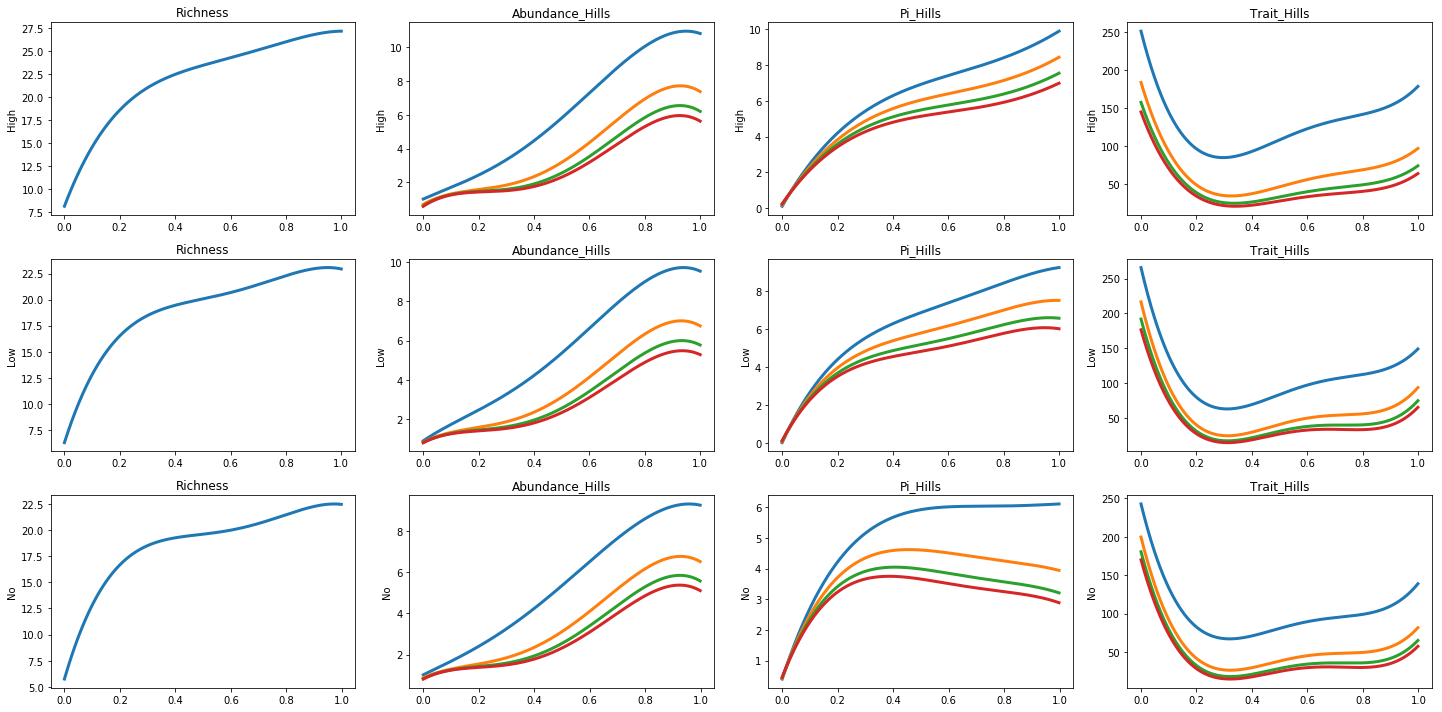

In [194]:
plot_sumstats_through_time(neutral_df, scatter=False, normalize_hills=False)

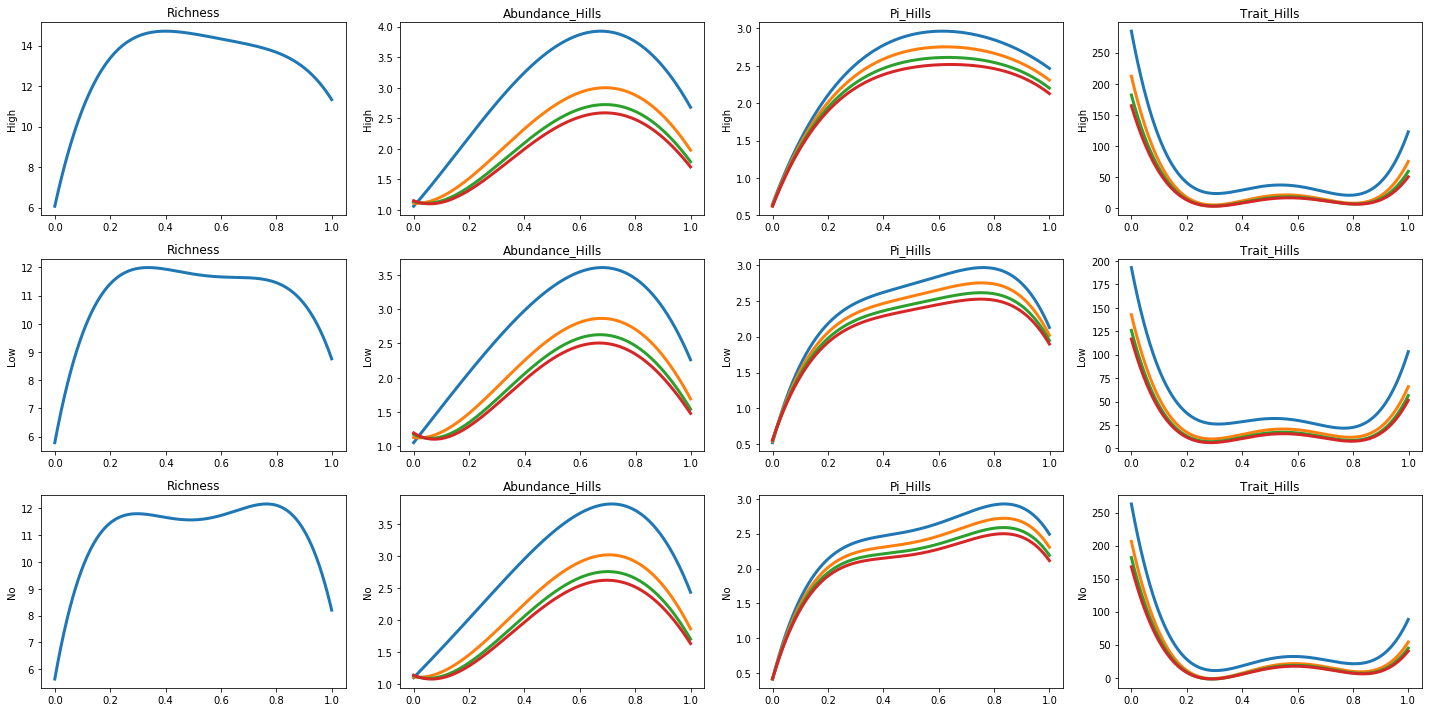

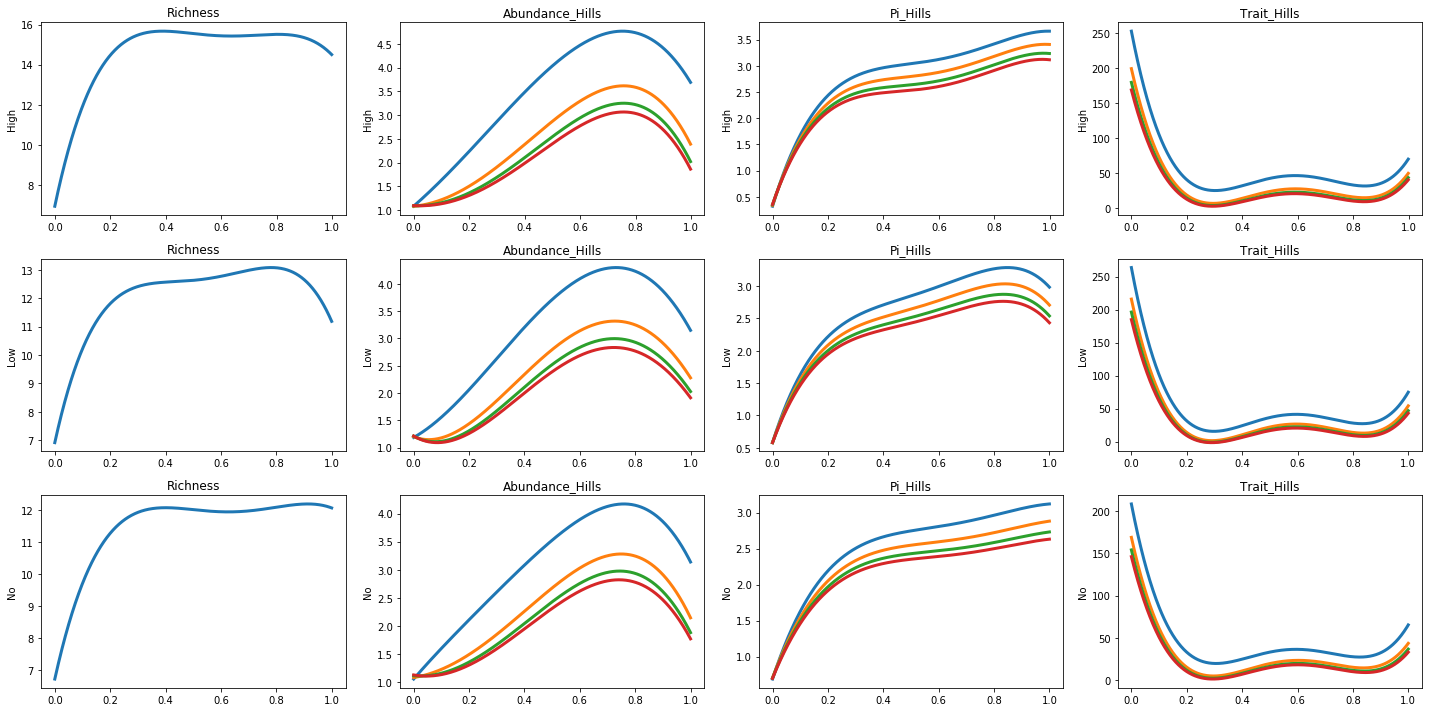

In [197]:
filt_sims = non_neutral_df.loc[non_neutral_df["community_assembly_model"] == "filtering"]
comp_sims = non_neutral_df.loc[non_neutral_df["community_assembly_model"] == "competition"]
plot_sumstats_through_time(filt_sims, scatter=False, normalize_hills=False)
plot_sumstats_through_time(comp_sims, scatter=False, normalize_hills=False)

## Plot all assembly models on one figure.
Too crazy?

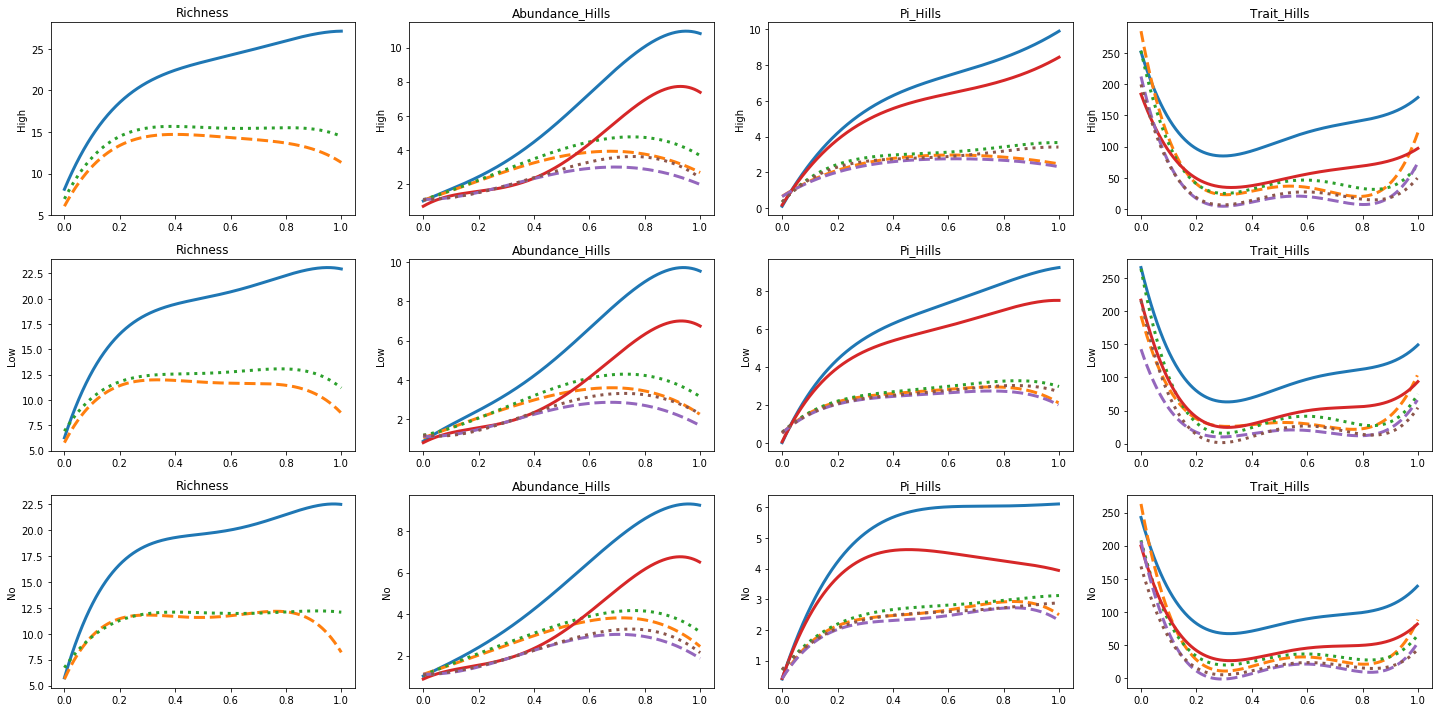

In [199]:

stat_dict = OrderedDict({})
stat_dict["Richness"] = ["S"]
stat_dict["Abundance_Hills"] = ["abund_h1", "abund_h2", "abund_h3", "abund_h4"]
stat_dict["Pi_Hills"] = ["pi_h1", "pi_h2", "pi_h3", "pi_h4"]
stat_dict["Trait_Hills"] = ["trait_h1", "trait_h2", "trait_h3", "trait_h4"]

full_df = pd.concat([neutral_df, non_neutral_df])

def plot_sumstats_through_time(sim_df, scatter=True, normalize_hills=False, n_hills=2):
    ## Get min and max y values so the y values can be scaled identically w/in columns
    def min_max(df, stat):
        return min(df[stat]), max(df[stat])
    ylims = {x:min_max(sim_df, stat_dict[x][0]) for x in stat_dict.keys()}

    fig, axs = plt.subplots(3, 4, figsize=(20, 10))

    for i, (spec_label, spec_prob) in enumerate(zip(["High", "Low", "No"], [0.001, 0.0001, 0])):
        
        for j, sumstats in enumerate(stat_dict):
            for stat in stat_dict[sumstats][:n_hills]:
                for model, ls in zip(["neutral", "filtering", "competition"],\
                                     ["solid", "dashed", "dotted"]):
                    x = sim_df.loc[sim_df["community_assembly_model"] == model]
                    x = x.loc[x["speciation_prob"] == spec_prob]["_lambda"]
                    y = sim_df.loc[sim_df["community_assembly_model"] == model]
                    y = y.loc[y["speciation_prob"] == spec_prob]
                    
                    ## Plotting
                    if normalize_hills and not stat == "S":
                        y = y[stat]/y["S"]
                    else:
                        y = y[stat]
                    z = np.poly1d(np.polyfit(x,y,4))
                    xs_z = np.linspace(0, max(x), 1000)
                    if scatter: axs[i][j].scatter(x, y, alpha=0.05, marker='.')
                    axs[i][j].plot(xs_z, z(xs_z), label=stat, lw=3, ls=ls)

                    ## Labeling and cleaning up the plots
                    axs[i][j].set_title(sumstats)
                    axs[i][j].set_ylabel(spec_label)
                    #axs[i][j].set_ylim(ylims[sumstats])
    plt.tight_layout()
plot_sumstats_through_time(full_df, scatter=False, normalize_hills=False, n_hills=2)

## Prototyping

(array([23., 15., 26., 23.,  6., 18., 21., 25., 18., 22.]),
 array([0.0041 , 0.00428, 0.00446, 0.00464, 0.00482, 0.005  , 0.00518,
        0.00536, 0.00554, 0.00572, 0.0059 ]),
 <a list of 10 Patch objects>)

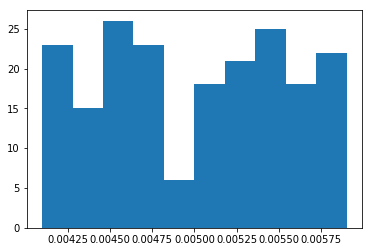

In [10]:
## Using toy data crib'd from another set of simulations
sim_df = pd.read_csv("/home/isaac/Continuosity/MESS/analysis/full-parameter-estimation/SIMOUT.txt", sep="\t", header=0)
sim_df.sort_values(by=['_lambda'])
sim_df = sim_df[np.logical_and(sim_df["m"] > 0.004, sim_df["m"] < 0.006)]
plt.hist(sim_df["m"])

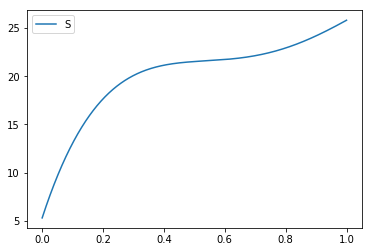

In [44]:
stat = "S"
x = sim_df["_lambda"]
y = sim_df[stat]
z = np.poly1d(np.polyfit(x,y,4))
xs_z = np.linspace(0, 1, 1000)
#plt.scatter(sim_df["_lambda"], sim_df["S"])
plt.plot(xs_z, z(xs_z), label=stat)
plt.legend()

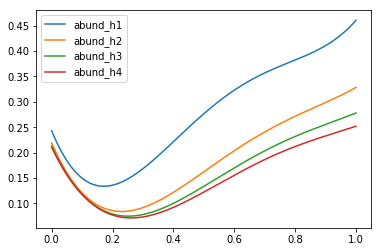

In [49]:
#for stat in ["pi_h1", "pi_h2", "pi_h3", "pi_h4"]:
for stat in ["abund_h1", "abund_h2", "abund_h3", "abund_h4"]:
#for stat in ["trait_h1", "trait_h2", "trait_h3", "trait_h4"]:
    x = sim_df["_lambda"]
    y = sim_df[stat]/sim_df["S"]
    z = np.poly1d(np.polyfit(x,y,4))
    xs_z = np.linspace(0, 1, 1000)
    #plt.scatter(sim_df["_lambda"], sim_df["S"])
    plt.plot(xs_z, z(xs_z), label=stat)
    plt.legend()